<a href="https://colab.research.google.com/github/boyila/124ofai_alphaml_sep4_2023/blob/main/obj_recog_celeb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
git remote add origin https://github.com/boyila/124ofai_alphaml_sep4_2023.git
git branch -M main
git push -u origin main


SyntaxError: ignored

In [ ]:
# Imports
import os
import io
import cv2
import numpy as np
import requests
from bs4 import BeautifulSoup
from PIL import Image
from IPython.display import display


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf





---

DATA COLLECTION
---



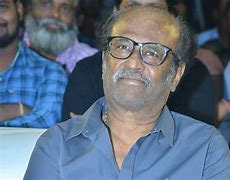

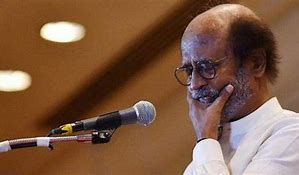

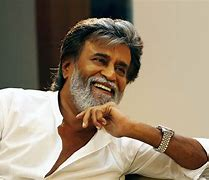

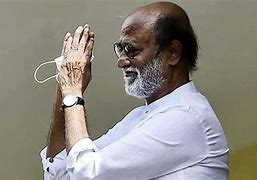

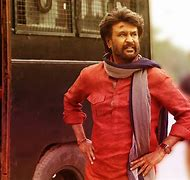

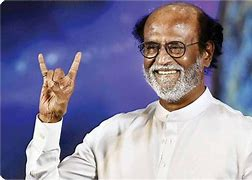

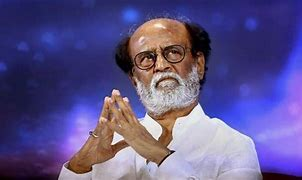

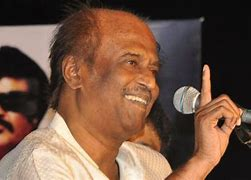

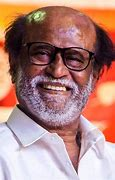

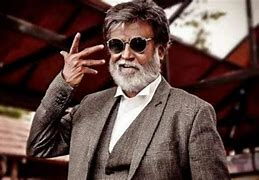

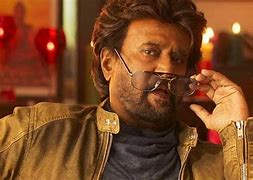

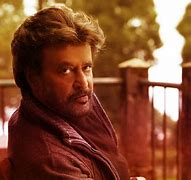

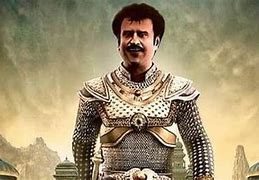

In [ ]:
# Data Collection



def fetch_image_urls(query: str, max_links_to_fetch: int, headers: dict):
    search_url = "https://www.bing.com/images/search?q={}&form=HDRSC2&first=1&cw=1129&ch=674"
    try:
        response = requests.get(search_url.format(query), headers=headers)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"Error during the request for '{query}': {e}")
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    image_elements = soup.find_all("img", class_="mimg")
    image_urls = [img["src"] for img in image_elements if "src" in img.attrs][:max_links_to_fetch]
    return image_urls


def save_images(folder_path: str, query: str, urls: list):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for i, url in enumerate(urls):
        try:
            if url.startswith('data:image'):
                print(f"Skipping image {i} for '{query}': Not a direct image link")
                continue
            image_content = requests.get(url).content
            image_file = Image.open(io.BytesIO(image_content))
            image_file_path = os.path.join(folder_path, f"{query}_{i}.jpg")
            image_file.save(image_file_path)
            display(image_file)
        except Exception as e:
            print(f"Error saving image {i} for '{query}': {e}")



def scrape_and_save(query: str, num_images: int, save_path:str):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    urls = fetch_image_urls(query, num_images, headers)
    save_images(save_path, query, urls)

# Download images
search_keywords = [
    "Rajinikanth", "Mahesh Babu", " Tiger Shroff", "Allu Arjun" ]
for keyword in search_keywords:
    scrape_and_save(keyword, 500 , f"data/{keyword}")

In [ ]:
# Create a database of celebrity features
celebrity_images = {}
for keyword in search_keywords:
    for i in range(500):
        celebrity_images[f"{keyword}_{i}"] = f"data/{keyword}/{keyword}_{i}.jpg"



# FEATURE EXTRACTION


In [ ]:

# Celebrity Recognition using SIFT

def extract_sift_features(img):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    return des  # Return descriptors


# Create a database of mean SIFT descriptors for each category
X = []  # Features
y = []  # Labels





for celebrity, image_path in celebrity_images.items():
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    descriptors = extract_sift_features(img)
    if descriptors is not None:
        mean_descriptor = descriptors.mean(axis=0)
        X.append(mean_descriptor)
        y.append(celebrity.split("_")[0])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Convert all_descriptors to a numpy array
all_descriptors = np.vstack(all_descriptors)



NameError: ignored

# TRAINING THE CLASSIFIER

In [ ]:
# Train a classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(all_descriptors, labels, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Classifier
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Recognize celebrity using the trained classifier
def recognize_celebrity(img):
    descriptors = extract_sift_features(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    if descriptors is None:
        return None

    # Predict using the classifier
    predictions = [clf.predict_proba(des.reshape(1, -1))[0] for des in descriptors]
    avg_prediction = np.mean(predictions, axis=0)
    predicted_label = clf.classes_[np.argmax(avg_prediction)]
    return predicted_label

# # Train a classifier
# # Splitting data into training and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize features
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# # Classifier
# clf = SVC(probability=True)
# clf.fit(X_train, y_train)

# # Recognize celebrity using the trained classifier
# def recognize_celebrity(img):
#     descriptors = extract_sift_features(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
#     if descriptors is None:
#         return None

    # mean_descriptor = descriptors.mean(axis=0).reshape(1, -1)
    # mean_descriptor = scaler.transform(mean_descriptor)  # Standardize
    # predicted_label = clf.predict(mean_descriptor)[0]
    # return predicted_label

# Use Haar cascades for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')




In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# clf = SVC(probability=True)
# clf.fit(X_train, y_train)

# def recognize_celebrity(img):
#     descriptors = extract_sift_features(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
#     if descriptors is None:
#         return None

#     mean_descriptor = descriptors.mean(axis=0).reshape(1, -1)
#     mean_descriptor = scaler.transform(mean_descriptor)
#     predicted_label = clf.predict(mean_descriptor)[0]
#     return predicted_label

NameError: ignored

# VIDEO PROCESSING

In [ ]:
def process_video(input_video_path, output_video_path):
    cap = cv2.VideoCapture(input_video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        frame_count += 1

        # Skip frames for faster processing
        if frame_count % 2 != 0:
            continue

        if not ret:
            break

        # Detect faces using Haar cascades
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        for (x, y, w, h) in faces:
            face_img = frame[y:y+h, x:x+w]
            celebrity_name = recognize_celebrity(face_img)
            if celebrity_name:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)
                cv2.putText(frame, celebrity_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)

        out.write(frame)

    cap.release()
    out.release()

# Process the video and save the annotated video
input_video = 'actors.mp4'
output_video = 'actors_detected.mp4'
process_video(input_video, output_video)